In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kagglehub

In [3]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [7]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

df.head()

/tmp/ipython-input-784503408.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [8]:
# 무작위 표본 추출(sample size = 1000)
sample = df.sample(n=1000, random_state=42)

# 평균, 표준편차 비교
(df['TotalPrice'].mean(), df['TotalPrice'].std()), (sample['TotalPrice'].mean(),sample['TotalPrice'].std())

((np.float64(17.98779487699964), 378.81082350615196),
 (np.float64(16.832069999999998), 64.46732773087352))

(np.float64(17.98779487699964), 378.81082350615196) (np.float64(20.286640000000002), np.float64(10.120876502192003)) (np.float64(18.6150496), np.float64(3.30863132853448))


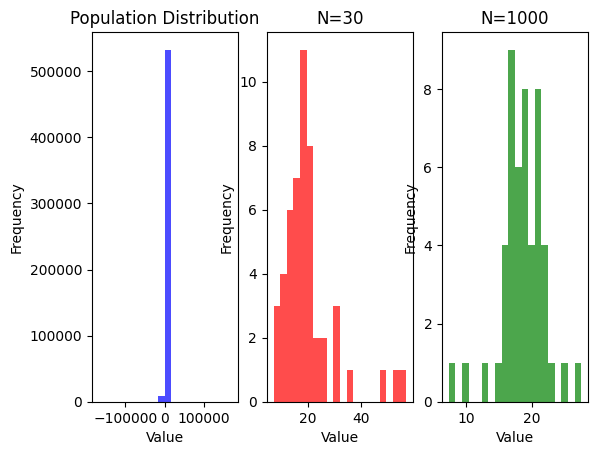

In [9]:
# 중심극한정리: 무작위 추출 표본 크기 증가할수록 표본 평균의 분포는 정규분포로 근사한다(모집단 분포와 관계없이)
# 표본 평균의 평균은 모집단 평균으로 근사

# 무작위 표본 추출, 표본평균 저장
num_sample = 50
samplemeans_30 = []
for sample_mean in range(num_sample):
    samplemeans_30.append(np.mean(np.random.choice(df['TotalPrice'], size=30)))

samplemeans_1000 = []
for sample_mean in range(num_sample):
    samplemeans_1000.append(np.mean(np.random.choice(df['TotalPrice'], size=1000)))

# 모집단 평균, 표준편차, 표본평균(n=100) 평균, 표준편차, 표본평균(n=1000) 평균, 표준편차
print(
    (df['TotalPrice'].mean(), df['TotalPrice'].std()), (np.mean(np.array(samplemeans_30)), np.std(np.array(samplemeans_30))),
    (np.mean(np.array(samplemeans_1000)), np.std(np.array(samplemeans_1000)))
)

# 모집단 분포, 표본평균 분포 비교
plt.subplot(1, 3, 1)
plt.hist(df['TotalPrice'], bins=20, color="blue", alpha=0.7)
plt.title("Population Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(samplemeans_30, bins=20, color="red", alpha=0.7)
plt.title("N=30")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
plt.hist(samplemeans_1000, bins=20, color="green", alpha=0.7)
plt.title("N=1000")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [10]:
df['Country'].value_counts().head(2)

# df 필터링
UK = df[df['Country']=='United Kingdom']['TotalPrice']
Germany = df[df['Country']=='Germany']['TotalPrice']

In [11]:
from scipy import stats
from scipy.stats import norm

# scipy two sample t test
t_stat, p_val = stats.ttest_ind(UK, Germany, equal_var=True)

print("Student's t-test")
print(f"t-통계량: {t_stat:.4f}")
print(f"p-값: {p_val:.4f}")

Student's t-test
t-통계량: -1.6839
p-값: 0.0922


two sample t test 결과, p value = 약 0.0922  
  
두 그룹(UK, Germany)의 평균과 분산이 동일하다는 가정 하에,
현재 분석한 데이터(표본)과 같은 결과 이상으로 희박한 결과가 나타날 확률은 0.0922  
  
유의수준 alpha를 관례에 따라 0.05로 설정 시, 귀무가설을 기각할 수 없음, 따라서 통계적으로 유의하지 않음  
  
1종 오류: False Positive, 두 집단 간 차이가 존재하지 않으나 귀무가설을 기각하는 경우  
유의수준 alpha를 설정하여 발생 확률 통제, 해당 경우에서는 alpha=0.05로 설정하였음  
  
2종 오류: False Negative, 두 집단 간 차이가 존재하지만 귀무가설을 기각하지 못하는 경우

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [12]:
weekday = df[(df['DayOfWeek']!=5)&(df['DayOfWeek']!=6)]['UnitPrice']
weekend = df[df['DayOfWeek']==6]['UnitPrice']

wd_df = pd.DataFrame({
    'mean':weekday.mean(),
    'median':weekday.median(),
    'std':weekday.std(),
    'var':weekday.var(),
    'Q1':pd.Series(np.quantile(weekday, q=.25)),
    'Q2':pd.Series(np.quantile(weekday, q=.5)),
    'Q3':pd.Series(np.quantile(weekday, q=.75)),
})

we_df = pd.DataFrame({
    'mean':weekend.mean(),
    'median':weekend.median(),
    'std':weekend.std(),
    'var':weekend.var(),
    'Q1':pd.Series(np.quantile(weekend, q=.25)),
    'Q2':pd.Series(np.quantile(weekend, q=.5)),
    'Q3':pd.Series(np.quantile(weekend, q=.75)),
})
wd_df, we_df

(       mean  median         std           var    Q1   Q2    Q3
 0  4.843425     2.1  103.032058  10615.604927  1.25  2.1  4.13,
        mean  median       std        var    Q1    Q2    Q3
 0  2.887824    1.85  7.959497  63.353599  1.25  1.85  3.75)

In [13]:
weekend.head()

,UnitPrice
7419,3.95
7420,4.95
7421,4.65
7422,3.75
7423,3.75


In [14]:
# plt.subplot(2, 2, 1)
# plt.hist(weekday)
# plt.title('weekday')
# plt.grid(axis='y', alpha=0.5)

# plt.subplot(2, 2, 2)
# sns.swarmplot(data=weekday)
# plt.title('weekday')
# plt.grid(axis='y', alpha=0.5)

# plt.subplot(2, 2, 3)
# plt.hist(weekend)
# plt.title('weekend')
# plt.grid(axis='y', alpha=0.5)

# plt.subplot(2, 2, 4)
# sns.swarmplot(data=weekend)
# plt.title('weekend')
# plt.grid(axis='y', alpha=0.5)

# plt.show()

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [15]:
lr_df = df[['UnitPrice','Country','DayOfWeek','InvoiceMonth','Quantity']].copy()
lr_df.head()
lr_df.describe()

,UnitPrice,DayOfWeek,InvoiceMonth,Quantity
count,541909.000000,541909.000000,541909.000000,541909.000000
mean,4.611114,2.431277,7.553128,9.552250
std,96.759853,1.844709,3.509055,218.081158
min,-11062.060000,0.000000,1.000000,-80995.000000
25%,1.250000,1.000000,5.000000,1.000000
50%,2.080000,2.000000,8.000000,3.000000
75%,4.130000,4.000000,11.000000,10.000000
max,38970.000000,6.000000,12.000000,80995.000000


In [16]:
# NaN drop

lr_df.dropna(axis=0, inplace=True)
lr_df.drop(axis=0, index=lr_df[lr_df['Quantity']<0].index, inplace=True)
lr_df.drop(axis=0, index=lr_df[lr_df['UnitPrice']<0].index, inplace=True)
lr_df.head()
lr_df.describe()

,UnitPrice,DayOfWeek,InvoiceMonth,Quantity
count,531283.000000,531283.000000,531283.000000,531283.000000
mean,3.898954,2.435555,7.560242,10.655299
std,35.876279,1.849817,3.508723,156.830617
min,0.000000,0.000000,1.000000,1.000000
25%,1.250000,1.000000,5.000000,1.000000
50%,2.080000,2.000000,8.000000,3.000000
75%,4.130000,4.000000,11.000000,10.000000
max,13541.330000,6.000000,12.000000,80995.000000


In [17]:
# outlier drop

Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lr_df = lr_df[(lr_df['Quantity'] >= lower_bound) & (lr_df['Quantity'] <= upper_bound)]

Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lr_df = lr_df[(lr_df['UnitPrice'] >= lower_bound) & (lr_df['UnitPrice'] <= upper_bound)]

lr_df.describe()

,UnitPrice,DayOfWeek,InvoiceMonth,Quantity
count,437073.000000,437073.000000,437073.000000,437073.000000
mean,2.693576,2.458605,7.582070,4.936754
std,1.929207,1.875298,3.512793,4.509908
min,0.000000,0.000000,1.000000,1.000000
25%,1.250000,1.000000,5.000000,1.000000
50%,2.080000,2.000000,8.000000,3.000000
75%,3.750000,4.000000,11.000000,8.000000
max,8.330000,6.000000,12.000000,23.000000


In [18]:
# one hot encoding
lr_df = pd.get_dummies(lr_df, columns=['Country'], drop_first=True)
lr_df = lr_df.astype('int')
lr_df.head()

,UnitPrice,DayOfWeek,InvoiceMonth,Quantity,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,2,2,12,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,2,12,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,2,12,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,2,12,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,2,12,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 연속형 변수 표준화 (StandardScaler)
std_scaler = StandardScaler()
std_scaler.fit_transform(pd.DataFrame(lr_df['UnitPrice']))

# 모델 학습
X = lr_df.drop('Quantity', axis=1)
y = lr_df['Quantity']
model = LinearRegression()
model.fit(X, y)

# 결과 평가
model.predict(X)
coef = model.coef_
r_squared = model.score(X, y)
print(coef)
print(r_squared)

[-6.80171947e-01 -3.94966426e-02 -1.94792771e-02  7.23054618e-01
 -8.28951682e-01  6.48698416e-01 -9.05374918e-02  8.50948537e-01
  6.27244315e-01 -1.65673914e+00  4.29317011e+00  2.56297453e+00
  4.50452715e-01  9.53410329e-04  9.25502068e-01  4.49324393e-01
  8.78845097e-01  1.18393312e+00  1.00367807e+00  1.01957826e+00
 -4.45691635e-01  7.21651283e-01 -3.66293955e+00  1.50845073e+00
  5.48269659e+00 -5.70585356e-01  2.03038097e-04  1.19142947e+00
  9.42825043e-01 -3.86734873e-01 -9.15802711e-01  4.61464167e-01
  2.97918494e+00 -1.22743474e+00  1.50677929e+00  7.24225862e-01
  6.84025879e-01  1.81000537e+00 -3.34875344e+00 -3.41601209e+00]
0.13212546322105456


쓸모없는 질적 변수가 너무 많다(country one hot encoding)  
몇몇 country 변수에 따라 종속변수의 변화가 큰 경우 존재하지만 심하지 않다

결정계수 r_squared: 모델이 종속변수의 변화를 설명하는 정도, 0이상 1이하의 값 가짐  
모델이 잘 맞지 않음

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

quantity < 0 = return  
outlier 제거: Quantity, UnitPrice, TotalPrice  
drop: InvoiceNo, StockCode, Description, InvoiceDate, CustomerID, Country  

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


In [21]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,DayOfWeek,InvoiceMonth
count,541909.000000,541909,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,17.987795,2.431277,7.553128
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,-168469.600000,0.000000,1.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,3.400000,1.000000,5.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,9.750000,2.000000,8.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,17.400000,4.000000,11.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000,6.000000,12.000000
std,218.081158,NaN,96.759853,1713.600303,378.810824,1.844709,3.509055


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       541909 non-null  object        
 8   TotalPrice    541909 non-null  float64       
 9   DayOfWeek     541909 non-null  int32         
 10  InvoiceMonth  541909 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(4)
memory usage: 41.3+ MB


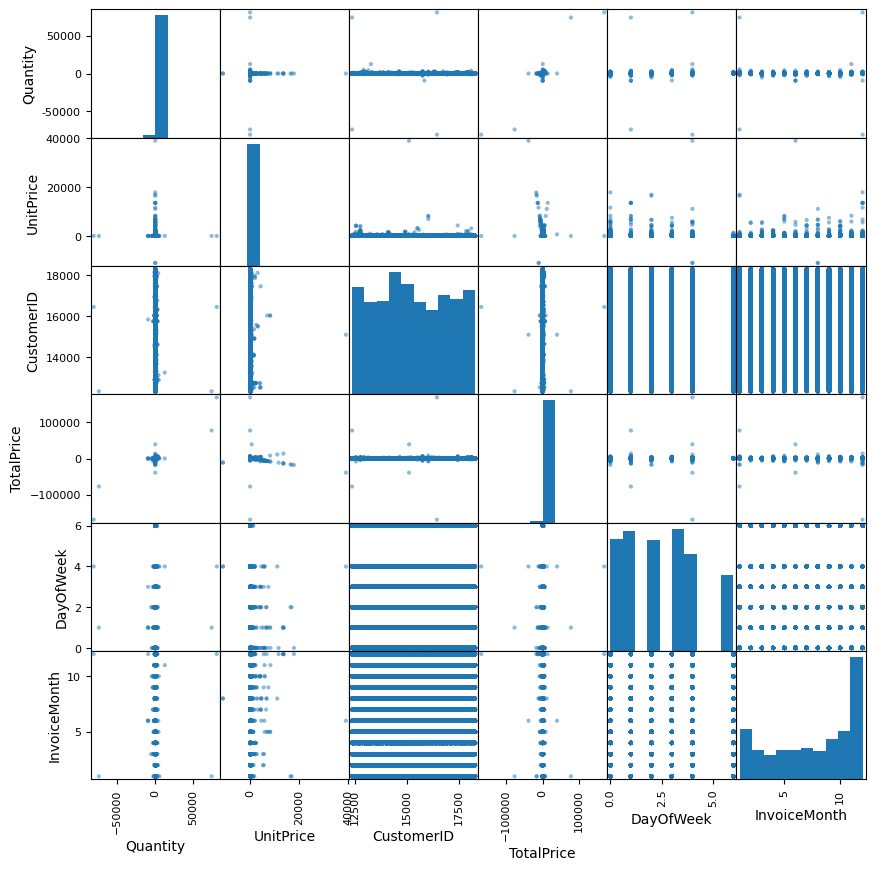

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10, 10))
plt.show()

In [24]:
df[['Quantity','UnitPrice','TotalPrice']].describe()

,Quantity,UnitPrice,TotalPrice
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,17.987795
std,218.081158,96.759853,378.810824
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.400000
50%,3.000000,2.080000,9.750000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


In [25]:
df['Quantity'].sort_values()

,Quantity
540422,-80995
61624,-74215
225529,-9600
225530,-9600
4287,-9360
...,...
421632,4800
74614,5568
502122,12540
61619,74215


In [26]:
df.drop(axis=0, index=df[df['Quantity']<-9000].index, inplace=True)
df.drop(axis=0, index=df[df['Quantity']>10000].index, inplace=True)
df['Quantity'].sort_values()

,Quantity
115818,-5368
431381,-4830
341601,-3667
323458,-3167
160145,-3114
...,...
97432,3906
220843,4000
206121,4300
421632,4800


<Axes: ylabel='Quantity'>

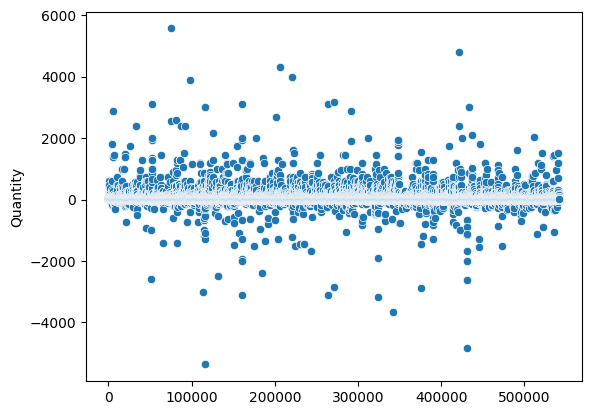

In [27]:
sns.scatterplot(df['Quantity'])

In [28]:
df['UnitPrice'].sort_values()

,UnitPrice
299984,-11062.06
299983,-11062.06
264421,0.00
290580,0.00
1972,0.00
...,...
15016,13541.33
43703,16453.71
43702,16888.02
524602,17836.46


In [29]:
df.drop(axis=0, index=df[df['UnitPrice']<0].index, inplace=True)
df.drop(axis=0, index=df[df['UnitPrice']>20000].index, inplace=True)
df['UnitPrice'].sort_values().tail(30)

,UnitPrice
124787,5225.03
96845,5258.77
16313,5519.25
342611,5522.14
96844,5575.28
124741,5693.05
239250,5791.18
191385,5876.40
446434,5877.18
383495,5942.57


<Axes: ylabel='UnitPrice'>

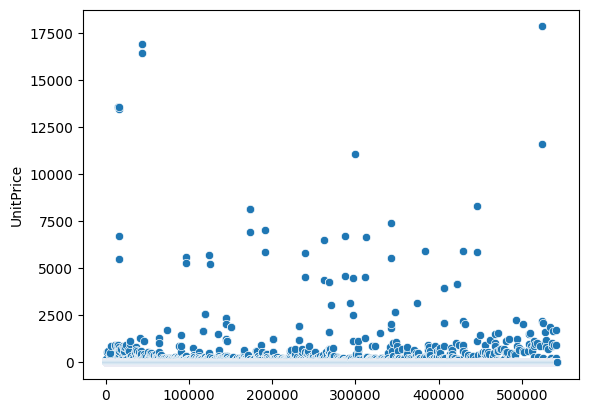

In [30]:
sns.scatterplot(df['UnitPrice'])

In [31]:
df['TotalPrice'].sort_values().tail(30)

,TotalPrice
160545,3380.00
447035,3549.00
348323,3621.00
511421,3651.60
52710,3700.00
19871,3794.40
348319,3825.36
16438,3828.00
533812,3861.00
406406,3949.32


In [32]:
df.drop(axis=0, index=df[df['TotalPrice']>20000].index, inplace=True)

<Axes: ylabel='TotalPrice'>

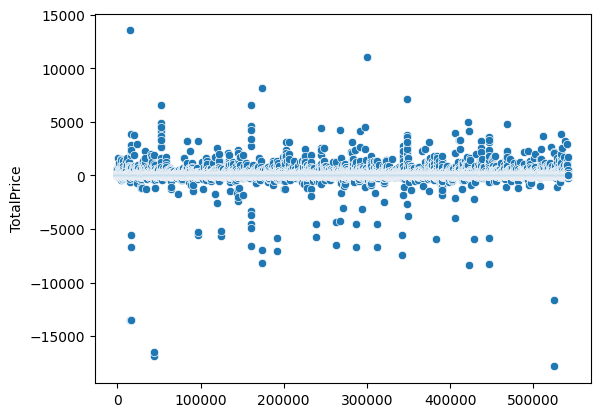

In [33]:
sns.scatterplot(df['TotalPrice'])

In [34]:
df.drop(axis=1, columns=['InvoiceNo','StockCode','Description','CustomerID', 'InvoiceDate', 'Country'], inplace=True)
df.head()

,Quantity,UnitPrice,TotalPrice,DayOfWeek,InvoiceMonth
0,6,2.55,15.30,2,12
1,6,3.39,20.34,2,12
2,8,2.75,22.00,2,12
3,6,3.39,20.34,2,12
4,6,3.39,20.34,2,12


In [35]:
# quantity < 0인 주문 = 반품
df['IsReturn'] = df['Quantity'].apply(lambda x: 1 if x < 0 else 0)
df['IsReturn'].value_counts()

,count
IsReturn,
0,531279
1,10617


In [36]:
# sns.pairplot(df, hue='IsReturn')

Confusion Matrix:
[[106239      0]
 [     0   2141]]

Model Performance Metrics:
Precision Score: 1.0000
Recall Score: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000


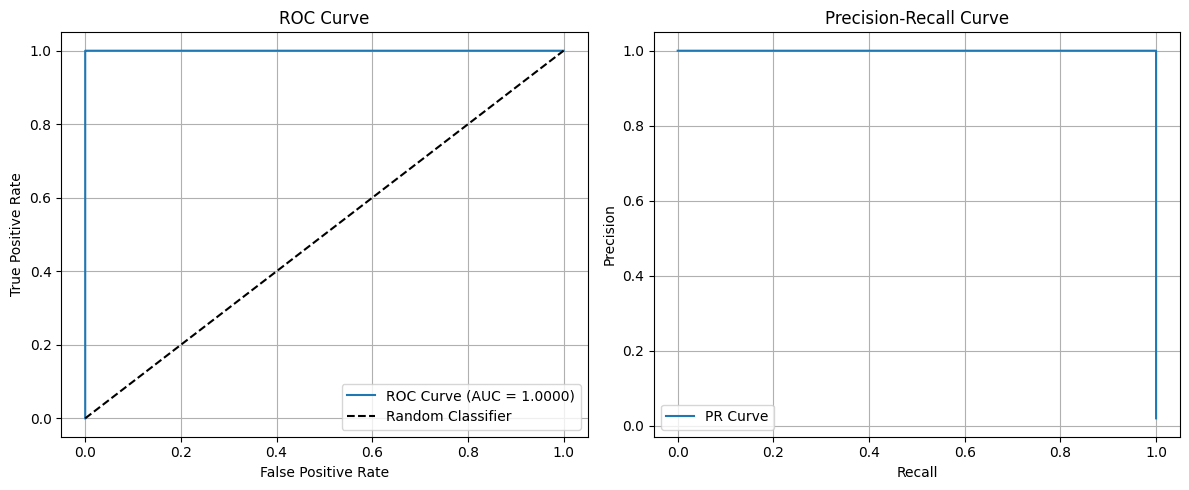

In [49]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

X = df.drop(axis=1, columns=['IsReturn'])
y = df['IsReturn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nModel Performance Metrics:")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(recall_vals, precision_vals, label=f'PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

개선안  
feature: 반품 비율 높은 특정 stockcode, customerID, country, 주문 시간(bucketizing), 주문 요일, 주문 달 식별  
규제 적용: elastic net  
EDA 전 test set 분리 후 진행  
코드 오류 수정,,